In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
hosp_df = pd.read_csv('../hospitals.csv')
hosp_df.tail()

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
32,Tripura,114,22,12,9,157,4895
33,Uttar Pradesh,3277,671,NaN,174,4122,58310
34,Uttarakhand,275,69,19,20,383,6660
35,West Bengal,1374,406,70,55,1905,51163
36,All India,"29,899","5,568","1,255","1,003","37,725","7,39,024"


In [17]:
hosp_df = hosp_df.fillna(0)
hosp_df.isna().sum()
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37 non-null     object
 1   PHC           37 non-null     object
 2   CHC           37 non-null     object
 3   SDH           37 non-null     object
 4   DH            37 non-null     object
 5   Hospitals     37 non-null     object
 6   HospitalBeds  37 non-null     object
dtypes: object(7)
memory usage: 2.1+ KB


In [18]:
hosp_df.iloc[:, 1:] = hosp_df.iloc[:, 1:].applymap(lambda x: x.replace(',', '')).astype(int)
hosp_df.tail()

C:\Users\Miles\AppData\Local\Temp\ipykernel_9824\891234836.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  hosp_df.iloc[:, 1:] = hosp_df.iloc[:, 1:].applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x).astype(int)


,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
32,Tripura,114,22,12,9,157,4895
33,Uttar Pradesh,3277,671,0,174,4122,58310
34,Uttarakhand,275,69,19,20,383,6660
35,West Bengal,1374,406,70,55,1905,51163
36,All India,29899,5568,1255,1003,37725,739024


In [60]:
hosp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37 non-null     object
 1   PHC           37 non-null     int32 
 2   CHC           37 non-null     int32 
 3   SDH           37 non-null     int32 
 4   DH            37 non-null     int32 
 5   Hospitals     37 non-null     int32 
 6   HospitalBeds  37 non-null     int32 
dtypes: int32(6), object(1)
memory usage: 1.3+ KB


In [61]:
hosp_df.describe()

,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,1616.162162,300.972973,67.837838,54.216216,2039.189189,39947.243243
std,4861.772656,907.160512,208.708797,163.173584,6130.345694,120196.898697
min,4.000000,2.000000,0.000000,1.000000,8.000000,250.000000
25%,87.000000,17.000000,1.000000,9.000000,114.000000,2666.000000
50%,521.000000,82.000000,13.000000,23.000000,683.000000,13527.000000
75%,1417.000000,229.000000,47.000000,37.000000,1867.000000,39511.000000
max,29899.000000,5568.000000,1255.000000,1003.000000,37725.000000,739024.000000


### Fix Headers - Problem 10

In [19]:
hosp_df.columns

Index(['Unnamed: 0', 'PHC', 'CHC', 'SDH', 'DH', 'Hospitals', 'HospitalBeds'], dtype='object')

In [62]:
hosp_df = hosp_df.rename(columns={'Unnamed: 0': 'State/UT'})
hosp_df.head()

,State/UT,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,0,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [21]:
hosp_metadata = pd.read_csv('../metadata.csv')
hosp_metadata.head()

,Acronyms
0,"Number of Primary Health Centers(PHCs),"
1,"Community Health Centers(CHCs),"
2,Sub-District/Divisional Hospitals(SDHs)
3,District Hospitals(DHs)


In [22]:
new_cols = {acro: fullform.split('(')[0] for acro, fullform in zip(hosp_df.iloc[:, 1:].columns, hosp_metadata['Acronyms']) if acro in fullform}
new_cols

{'PHC': 'Number of Primary Health Centers',
 'CHC': 'Community Health Centers',
 'SDH': 'Sub-District/Divisional Hospitals',
 'DH': 'District Hospitals'}

In [65]:
hosp_df = hosp_df.rename(columns=new_cols)
hosp_df.head()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,0,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,0,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


### Create uniformity in column 'State/UT' - Problem 11

In [66]:
def format_states(df):
    name_correction = {"puducherry": "pondicherry", "nct of delhi": "delhi", "odisha": "orissa"}
    
    df["State/UT"]=df["State/UT"].str.lower()
    df["State/UT"]=df["State/UT"].replace(name_correction)
    df["State/UT"]=df["State/UT"].str.title()
    df['State/UT'] = df['State/UT'].str.replace('&', 'and').str.rstrip('*')
    return df

In [67]:
hosp_df = format_states(hosp_df)
hosp_df

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
0,Andaman and Nicobar Islands,27,4,0,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,0,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra and Nagar Haveli,9,2,1,1,13,568
8,Daman and Diu,4,2,0,2,8,298
9,Delhi,534,25,9,47,615,20572


In [37]:
hosp_df.to_csv('../cleandata/all_hospitals.csv', index=False)

### Healthcare facility disparity - Problem 12

In [14]:
cen_df = pd.read_csv('../cleandata/census_clean.csv', usecols = ['State/UT', 'Population',])
cen_df.head()

,State/UT,Population
0,Jammu and Kashmir,870354.0
1,Jammu and Kashmir,753745.0
2,Laddakh,133487.0
3,Laddakh,140802.0
4,Jammu and Kashmir,476835.0


In [15]:
hosp_df = pd.read_csv('../cleandata/all_hospitals.csv')
hosp_df.tail()

,State/UT,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
32,Tripura,114,22,12,9,157,4895
33,Uttar Pradesh,3277,671,0,174,4122,58310
34,Uttarakhand,275,69,19,20,383,6660
35,West Bengal,1374,406,70,55,1905,51163
36,All India,29899,5568,1255,1003,37725,739024


In [16]:
cen_state = (cen_df.groupby('State/UT')['Population'].sum()).reset_index()
cen_state.head()

,State/UT,Population
0,Andaman and Nicobar Islands,380581.0
1,Andhra Pradesh,84580777.0
2,Arunachal Pradesh,1383727.0
3,Assam,31205576.0
4,Bihar,104099452.0


In [17]:
merged = cen_state.merge(hosp_df, on='State/UT', how='right')
merged.tail()

,State/UT,Population,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
32,Tripura,3673917.0,114,22,12,9,157,4895
33,Uttar Pradesh,199812341.0,3277,671,0,174,4122,58310
34,Uttarakhand,10086292.0,275,69,19,20,383,6660
35,West Bengal,91276115.0,1374,406,70,55,1905,51163
36,All India,NaN,29899,5568,1255,1003,37725,739024


In [18]:
merged.iloc[-1, 1] = merged.iloc[:-1, 1].sum() if pd.isna(merged.iloc[-1, 1]) else merged.iloc[-1, 1]
merged.tail()

,State/UT,Population,Number of Primary Health Centers,Community Health Centers,Sub-District/Divisional Hospitals,District Hospitals,Hospitals,HospitalBeds
32,Tripura,3.673917e+06,114,22,12,9,157,4895
33,Uttar Pradesh,1.998123e+08,3277,671,0,174,4122,58310
34,Uttarakhand,1.008629e+07,275,69,19,20,383,6660
35,West Bengal,9.127612e+07,1374,406,70,55,1905,51163
36,All India,1.150547e+09,29899,5568,1255,1003,37725,739024


In [19]:
merged.isna().sum()
merged = merged.dropna()

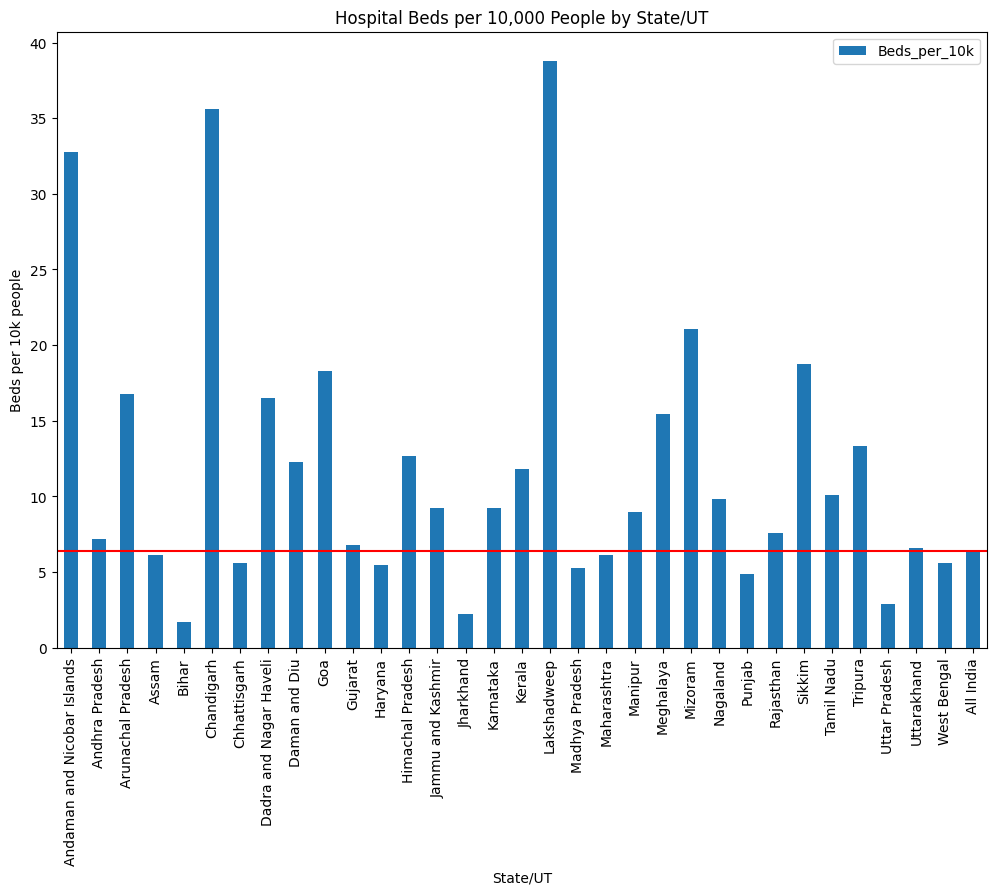

In [20]:
merged['Beds_per_10k'] = merged['HospitalBeds'] / merged['Population'] * 10000
country_total = merged.loc[merged['State/UT'] == 'All India', 'Beds_per_10k'].values[0]

ax = merged.plot(x='State/UT', y='Beds_per_10k', kind='bar', figsize=(12,8))
ax.axhline(y=country_total, color='red')

plt.xlabel('State/UT')
plt.ylabel('Beds per 10k people')
plt.title('Hospital Beds per 10,000 People by State/UT')
plt.show()

In [21]:
print('Three States/UTs which have the least amount of beds for their population')
merged.sort_values(by='Beds_per_10k').head(3)[['State/UT', 'Beds_per_10k']]


Three States/UTs which have the least amount of beds for their population


,State/UT,Beds_per_10k
4,Bihar,1.709519
15,Jharkhand,2.244443
33,Uttar Pradesh,2.918238
